# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## COLLABORATION

This homework was completed by Kevin Smith and Sarina Singh.

**Kevin Smith U76047763**

**Sarina Singh U69992014**

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [3]:
def num_nans(df):
    return len(df[df.isna().any(axis=1)])

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [4]:
def drop_na(df):
    num_na = df.isna().sum()

    columns_to_remove = num_na[num_na > 200].index.tolist()
    
    return df.drop(columns=columns_to_remove)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [5]:
def to_numerical(df):
    return df['Sex'].replace('male',0).replace('female',1)

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [6]:
def extract_names(df):
    name_split = df['Name'].str.extract(r'(?P<LastName>\w+), (?P<Title>\w+)\. (?P<FirstName>\w+) (?P<MiddleName>\w+)')
    
    return name_split[['FirstName', 'MiddleName', 'LastName', 'Title']]
    
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [7]:
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

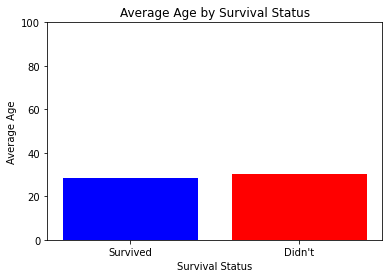

In [8]:
survived = df[df['Survived'] == 1]
didnt = df[df['Survived'] == 0]

avgYes = survived['Age'].mean()
avgNo = didnt['Age'].mean()

categories = ["Survived", "Didn't"]
average_age = [avgYes, avgNo]

plt.bar(categories, average_age, color=['blue', 'red'])
plt.xlabel('Survival Status')
plt.ylabel('Average Age')
plt.title('Average Age by Survival Status')
plt.ylim(0, 100)

plt.show()

Age seemed not to have a great effect on survival. In other words, the age distribution of those who survived vs. those who didn't might be different, but if so it's different on both ends, giving us a similar average age.

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

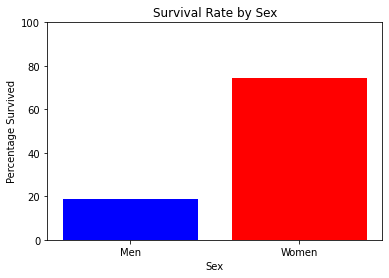

In [9]:
men = df[df['Sex'] == 0]
women = df[df['Sex'] == 1]

proportionMen = len(men[men['Survived'] == 1]) / len(men)
proportionWomen = len(women[women['Survived'] == 1]) / len(women)

categories = ["Men", "Women"]
proportions = [100*proportionMen, 100*proportionWomen]

plt.bar(categories, proportions, color=['blue', 'red'])
plt.xlabel('Sex')
plt.ylabel('Percentage Survived')
plt.title('Survival Rate by Sex')
plt.ylim(0, 100)

plt.show()

A much higher proportion of women survived than men. It looks like around 75% of women survived while only around 20% of men survived.

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

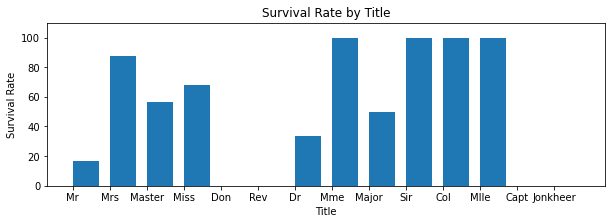

In [17]:
titles = df['Title'].unique().tolist()

categories = []
proportions = []

for title in titles:
    dfALT = df[df['Title'] == title]
    if len(dfALT != 0):
        proportion = len(dfALT[dfALT['Survived'] == 1]) / len(dfALT)
        categories.append(title)
        proportions.append(100*proportion)
        
plt.figure(figsize=(10, 3))  # width:20, height:3
    
plt.bar(categories, proportions, align='edge',width=0.7)
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Title')
plt.ylim(0, 110)

plt.show()

The titles Don, Rev, Capt, and Jonkheer had no survivors while the titles Mme, Sir, Col, and Mlle had 100% survival rates.

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

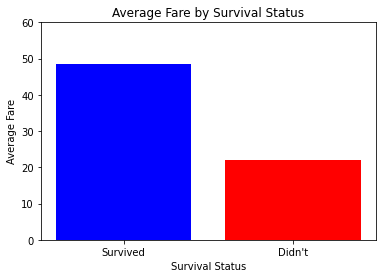

In [84]:
survived = df[df['Survived'] == 1]
didnt = df[df['Survived'] == 0]

avgYes = survived['Fare'].mean()
avgNo = didnt['Fare'].mean()
    
categories = ["Survived", "Didn't"]
average_fare = [avgYes, avgNo]

plt.bar(categories, average_fare, color=['blue', 'red'])
plt.xlabel('Survival Status')
plt.ylabel('Average Fare')
plt.title('Average Fare by Survival Status')
plt.ylim(0, 60)

plt.show()

On average, those who survived paid over double what those who didn't survive paid. This might be due to lifeboats being more available near the higher-class cabins, or a lack of competition for those lifeboats due to more people paying a lower fare.

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

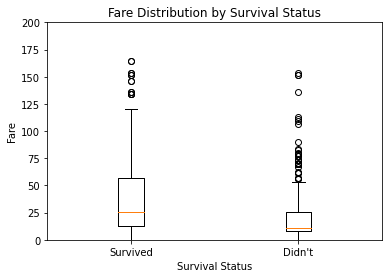

In [93]:
survived = df[df['Survived'] == 1]
didnt = df[df['Survived'] == 0]

fareYes = survived['Fare']
fareNo = didnt['Fare']
    
categories = ["Survived", "Didn't"]
average_fare = [fareYes, fareNo]

plt.boxplot(average_fare,labels=['Survived',"Didn't"])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survival Status')
plt.ylim(0, 200)

plt.show()

Of the people who paid the highest fares, more survived but some didn't. Of those who did not survive, many paid a middle-tier fare, but most paid a low fare. The same goes for those who did survive, but their distribution extends somewhat higher on the fare scale giving them a higher average fare.

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [97]:
def normalizeFares(df):
    
    mean = df['Fare'].mean()
    
    adjustedCol = df['Fare'].apply(lambda x : (x-mean)**2)
    std = (adjustedCol.sum() / len(adjustedCol))**0.5
    
    df['Fare'] = df['Fare'].apply(lambda x: (x-mean)/std)

normalizeFares(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502445,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786845,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488854,S,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420730,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486337,S,William,Henry,Allen,Mr


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [130]:
df = df.select_dtypes(include=['int64', 'float64'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,-0.502445
1,2,1,1,1,38.0,1,0,0.786845
2,3,1,3,1,26.0,0,0,-0.488854
3,4,1,1,1,35.0,1,0,0.420730
4,5,0,3,0,35.0,0,0,-0.486337


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [142]:
import numpy as np

def N_most_similar_pairs(df, N):
    
    distances = []
    
    for i in range(len(df)):
        for j in range(i+1,len(df)):
            distance = np.linalg.norm(df.drop(columns=['PassengerId']).iloc[i] - df.drop(columns=['PassengerId']).iloc[j])
            if distance != 0:
                distances.append((i, j, distance))
    
    d = sorted(distances, key = lambda x: x[2])
    
    result = "\n"
    
    for i in range(N):
        result += "Passenger "+str(d[i][0])+" and Passenger "+str(d[i][1])+" with Euclidean distance "+str(d[i][2])+"\n"
    
    return result

print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar pairs of passengers are: 
Passenger 240 and Passenger 578 with Euclidean distance 8.255221746500396e-05
Passenger 388 and Passenger 629 with Euclidean distance 8.255221746500396e-05
Passenger 19 and Passenger 367 with Euclidean distance 8.456568618353533e-05



## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

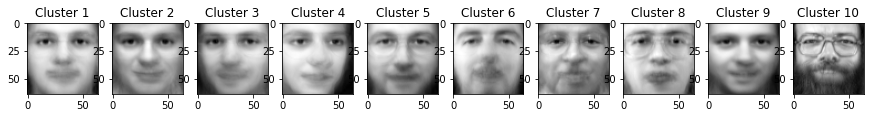

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data

# your code here
kmeans = KMeans(n_clusters=10, random_state=0)
faces_labels = kmeans.fit_predict(faces_data)

# Get the centroids of each cluster
cluster_centers = kmeans.cluster_centers_

# Plot the centroids of each cluster
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i in range(10):
    ax = axes[i]
    centroid = cluster_centers[i]
    ax.imshow(centroid.reshape(64, 64), cmap='gray')
    ax.set_title(f'Cluster {i + 1}')

plt.show()

#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [7]:
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = silhouette_score(faces_data, faces_labels)

# Obtain the true labels (person identities) and convert them to numeric labels
true_labels = faces.target

# Calculate the silhouette score for the clustering based on true labels
silhouette_score_true_labels = silhouette_score(faces_data, true_labels)

# Print the silhouette scores for both clustering approaches
print(f'Silhouette Score for K-Means Clustering: {silhouette_score_kmeans}')
print(f'Silhouette Score for True Labels Clustering: {silhouette_score_true_labels}')

Silhouette Score for K-Means Clustering: 0.09501403570175171
Silhouette Score for True Labels Clustering: 0.1055736318230629


The silhouette score for the K-Means clustering obtained in part A describes how well the K-Means sepearated the faces into similar clusters. The silhouette score from the clustering generated from the labels attached to each image describes how well the labels partition the data into seperated clusters based on similarity. Since the silhouette score for the true labels clustering is higher than the silhouette score for the K-means clustering, the true labels provide a better clustering than K-means. 

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

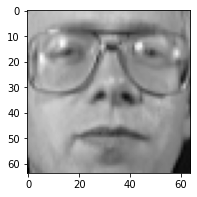

In [10]:
import random

fig_rand, axes_rand = plt.subplots(1, 1, figsize=(15, 3))
image = faces_data[random.randint(0, 399)]
axes_rand.imshow(image.reshape(64, 64), cmap='gray')
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

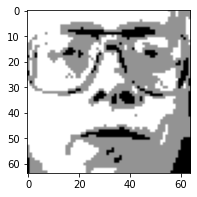

In [11]:
image_rand = image.copy().reshape(-1, 1)
kmeans_rand = KMeans(3, init='k-means++')
pixels_labels = kmeans_rand.fit_predict(image_rand)

# Get the centroids of each cluster
cluster_centers = kmeans_rand.cluster_centers_

for i in range(len(image_rand)): 
    if pixels_labels[i] == 0:
        image_rand[i] = cluster_centers[0]
    elif pixels_labels[i] == 1:
        image_rand[i] = cluster_centers[1]
    else: 
        image_rand[i] = cluster_centers[2]
        
fig_rand_recon, axes_rand_recon = plt.subplots(1, 1, figsize=(15, 3))
axes_rand_recon.imshow(image_rand.reshape(64, 64), cmap='gray')

plt.show()

#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

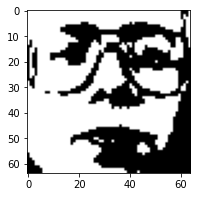

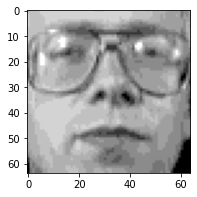

In [12]:
def reconstruct_image(image_rand, color_num):
    image = image_rand.copy().reshape(-1, 1)
    kmeans_rand = KMeans(color_num, init='k-means++')
    pixels_labels = kmeans_rand.fit_predict(image)

    # Get the centroids of each cluster
    cluster_centers = kmeans_rand.cluster_centers_

    for i in range(len(image)):
        for cluster_num in range(len(cluster_centers)):
            if pixels_labels[i] == cluster_num:
                image[i] = cluster_centers[cluster_num]
        
    fig_rand_recon, axes_rand_recon = plt.subplots(1, 1, figsize=(15, 3))
    axes_rand_recon.imshow(image.reshape(64, 64), cmap='gray')

    plt.show()
    return

reconstruct_image(image, 2)
reconstruct_image(image, 10)

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

In [5]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)

class KMeans3D():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []

    def snap(self, centers):
        TEMPFILE = "temp.png"

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=self.assignment)
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='r')
        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)), self.k, replace=False)]

    def distance(self, x, y):
        return np.linalg.norm(x - y)

    def assign(self, centers):
        for i in range(len(self.data)):
            delta = [float('inf'), 0]
            for j in range(len(centers)):
                distance = self.distance(centers[j], self.data[i])
                if distance < delta[0]:
                    delta[0] = distance
                    delta[1] = j

            self.assignment[i] = delta[1]

    def get_centers(self):
        centers = []

        for i in set(self.assignment):
            cluster = []

            for j in range(len(self.data)):

                if self.assignment[j] == i:
                    cluster.append(self.data[j])
            x = 0
            y = 0
            z = 0
            for delta in range(len(cluster)):
                x += cluster[delta][0]
                y += cluster[delta][1]
                z += cluster[delta][2]
            centers.append([x / len(cluster), y / len(cluster), z / len(cluster)])

        return np.array(centers)

    def is_diff_centers(self, centers, new_centers):
        n = len(centers)
        flag = 0
        for i in range(n):
            if any(centers[i][j] != new_centers[i][j] for j in range(3)):
                flag = 1

        if flag == 1:
            return True
        return False

    def lloyds(self):
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers)
        new_centers = self.get_centers()

        while self.is_diff_centers(centers, new_centers):
            self.assign(new_centers)
            centers = new_centers
            self.snap(centers)
            new_centers = self.get_centers()

kmeans = KMeans3D(X, 4)
kmeans.lloyds()
images = kmeans.snaps

images[0].save(
    'kmeans.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

<img src="kmeans.gif" width="750" align="center">